In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# Prepare train data

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The 95% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

## Create Neural Network

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics

In [7]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=scaled_train_samples,y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.7646 - accuracy: 0.4418 - val_loss: 0.7283 - val_accuracy: 0.5381
Epoch 2/30
1890/1890 - 0s - loss: 0.7169 - accuracy: 0.4132 - val_loss: 0.6961 - val_accuracy: 0.3000
Epoch 3/30
1890/1890 - 0s - loss: 0.6792 - accuracy: 0.6196 - val_loss: 0.6688 - val_accuracy: 0.6381
Epoch 4/30
1890/1890 - 0s - loss: 0.6485 - accuracy: 0.6968 - val_loss: 0.6416 - val_accuracy: 0.7095
Epoch 5/30
1890/1890 - 0s - loss: 0.6220 - accuracy: 0.7339 - val_loss: 0.6183 - val_accuracy: 0.7190
Epoch 6/30
1890/1890 - 0s - loss: 0.5977 - accuracy: 0.7529 - val_loss: 0.5937 - val_accuracy: 0.7571
Epoch 7/30
1890/1890 - 0s - loss: 0.5743 - accuracy: 0.7831 - val_loss: 0.5699 - val_accuracy: 0.7810
Epoch 8/30
1890/1890 - 0s - loss: 0.5512 - accuracy: 0.8058 - val_loss: 0.5461 - val_accuracy: 0.7810
Epoch 9/30
1890/1890 - 0s - loss: 0.5275 - accuracy: 0.8122 - val_loss: 0.5199 - val_accuracy: 0.8143
Epoch 10/30
1890/1890 - 0s - loss: 

## Prepare test data

In [11]:
test_labels = []
test_samples = []

In [12]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [13]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [14]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

In [15]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
for i in predictions:
    print(i)

[0.02741433 0.9725857 ]
[0.6930086  0.30699137]
[0.9261187 0.0738813]
[0.53960115 0.46039882]
[0.91024554 0.08975444]
[0.1282001  0.87179995]
[0.92651725 0.07348275]
[0.92591876 0.07408131]
[0.7958346  0.20416546]
[0.91591233 0.08408771]
[0.08675172 0.91324824]
[0.18543091 0.8145691 ]
[0.352973   0.64702696]
[0.9277011  0.07229895]
[0.28216672 0.7178332 ]
[0.9273445  0.07265545]
[0.48506483 0.5149351 ]
[0.15466486 0.8453352 ]
[0.813013   0.18698697]
[0.02567243 0.9743276 ]
[0.14091393 0.85908604]
[0.08675172 0.91324824]
[0.9257182  0.07428185]
[0.8926861  0.10731389]
[0.30481103 0.69518894]
[0.6192769  0.38072312]
[0.92750496 0.07249501]
[0.8439878  0.15601227]
[0.30481103 0.69518894]
[0.07093404 0.92906594]
[0.8824612  0.11753878]
[0.6446782  0.35532182]
[0.92764556 0.07235444]
[0.16949305 0.83050704]
[0.92591876 0.07408131]
[0.91591233 0.08408771]
[0.07093404 0.92906594]
[0.3783051 0.6216949]
[0.404319   0.59568095]
[0.8290567  0.17094338]
[0.9273445  0.07265545]
[0.7580403  0.241959

[0.92591876 0.07408131]
[0.03880706 0.9611929 ]
[0.9261187 0.0738813]
[0.92651725 0.07348275]
[0.92591876 0.07408131]
[0.48506483 0.5149351 ]
[0.9253156  0.07468438]
[0.7580403  0.24195966]
[0.45784873 0.5421513 ]
[0.6692899  0.33071014]
[0.7374425  0.26255754]
[0.9019822  0.09801783]
[0.05214886 0.9478512 ]
[0.2207189  0.77928114]
[0.9273445  0.07265545]
[0.8439878  0.15601227]
[0.7958346  0.20416546]
[0.8290567  0.17094338]
[0.9263182  0.07368178]
[0.05781939 0.94218063]
[0.3783051 0.6216949]
[0.09580676 0.9041932 ]
[0.07093404 0.92906594]
[0.04700676 0.9529933 ]
[0.92591876 0.07408131]
[0.7580403  0.24195966]
[0.92726916 0.07273091]
[0.9246286  0.07537133]
[0.07093404 0.92906594]
[0.9019822  0.09801783]
[0.05214886 0.9478512 ]
[0.15466486 0.8453352 ]
[0.43088207 0.5691179 ]
[0.03880706 0.9611929 ]
[0.404319   0.59568095]
[0.10569751 0.8943025 ]
[0.30481103 0.69518894]
[0.03124912 0.96875095]
[0.7958346  0.20416546]
[0.16949305 0.83050704]
[0.91024554 0.08975444]
[0.8439878  0.156012

[0.92749524 0.0725048 ]
[0.3783051 0.6216949]
[0.02250611 0.9774939 ]
[0.6692899  0.33071014]
[0.92591876 0.07408131]
[0.7374425  0.26255754]
[0.92491114 0.07508891]
[0.28216672 0.7178332 ]
[0.8824612  0.11753878]
[0.92691386 0.07308618]
[0.28216672 0.7178332 ]
[0.2207189  0.77928114]
[0.404319   0.59568095]
[0.02567243 0.9743276 ]
[0.042349 0.957651]
[0.3783051 0.6216949]
[0.9267158  0.07328422]
[0.43088207 0.5691179 ]
[0.404319   0.59568095]
[0.45784873 0.5421513 ]
[0.6930086  0.30699137]
[0.8926861  0.10731389]
[0.92772067 0.07227936]
[0.20250203 0.79749805]
[0.43088207 0.5691179 ]
[0.28216672 0.7178332 ]
[0.45784873 0.5421513 ]
[0.05781939 0.94218063]
[0.3783051 0.6216949]
[0.02567243 0.9743276 ]
[0.813013   0.18698697]
[0.042349 0.957651]
[0.04700676 0.9529933 ]
[0.03571901 0.96428096]
[0.5123698  0.48763022]
[0.404319   0.59568095]
[0.6692899  0.33071014]
[0.92741996 0.07258009]
[0.3783051 0.6216949]
[0.92601156 0.07398842]
[0.9253156  0.07468438]
[0.7958346  0.20416546]
[0.92764

In [16]:
rounded_predictions = np.argmax(predictions, axis = -1)
for i in rounded_predictions:
    print(i)

1
0
0
0
0
1
0
0
0
0
1
1
1
0
1
0
1
1
0
1
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
1
1
1
0
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
1
0
1
0
0
1
1
1
1
1
0
0
1
0
0
1
0
0
0
1
1
0
0
1
1
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
1
1
1
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
0
1
1
0
1
0
0
0
0
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
0
0
0
1
1
0
0
1
1
0
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
0
1
1
0
1
0
0
1
1
1
1
1
0
1
1
0
1
0
0
1
1
1
1
1
0
0
1
1
0
0
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
1
1
1
1
0
0
0
1
0
1
0
1
1
0
0
1
1
0
0
0
1
1
1
1
0
1
1
1
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
0
1
0
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
0
0
0
0
1
1
0
1
1
0
0
0
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
1
0
0
0
1
1
1
1
0
1
0
1
0
1
1
1
0
1
1
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
1
1
0
1
1
1
0
1
0
1
1
1
0
0
0
1
0
0
1
0
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
0
1
0
0
1
0
1
1
0
0
1
0
0
1
0
1
1
0
0
0
1
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
1
1
1
1
0
0
1
0
0
0
1
1
0
1
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
0
0
1
1
0
0
1
1
0
0
0
1
0
1
0
1
0
0
0
1


# Confusion Matrix

In [17]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [18]:
cm = confusion_matrix(y_true=test_labels, y_pred = rounded_predictions)

In [19]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment= "center",
                 color="white" if cm[i,j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 960   90]
 [  48 1002]]


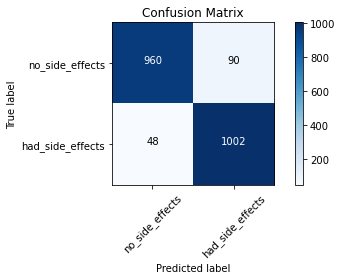

In [20]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save and load a model

In [22]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [23]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [24]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [25]:
new_model.get_weights()

[array([[ 0.58893895,  0.68148094, -0.37627852,  0.30656695,  0.3490431 ,
         -0.15568396, -0.5574559 , -0.09368497, -0.29802954, -0.06274402,
         -0.01993436, -0.1854038 , -0.09231742,  0.39663985,  0.27664378,
         -0.41124704]], dtype=float32),
 array([-0.09713698, -0.1651229 ,  0.        , -0.09695452, -0.10854028,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.27238992,  0.2115877 , -0.0859435 ,
         0.        ], dtype=float32),
 array([[ 0.07250738,  0.5041785 ,  0.53725404, -0.4684831 ,  0.27896523,
          0.27671996,  0.08468569,  0.06306896,  0.08705315,  0.08421089,
          0.5026604 ,  0.27568114, -0.06757242,  0.54940534, -0.02570367,
         -0.20510511,  0.09150958,  0.16327134,  0.26163104, -0.3563221 ,
         -0.15309201,  0.16165957,  0.08472577, -0.02076989, -0.28608683,
         -0.07446082, -0.10981344,  0.10019436, -0.1315416 ,  0.43779582,
         -0.21292351, -0.12967572],
 

In [27]:
new_model.optimizer

## 2. Model to json

In [32]:
# Save as JSON
json_string = model.to_json()

# Save as YAML
# yaml_string = model.to_yaml()

In [33]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [35]:
# Model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# Model reconstruction from YAML:
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [36]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3. Model.save_weights()

In [37]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save('models/my_model_weights.h5')

In [39]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [40]:
model2.load_weights('models/my_model_weights.h5')

In [41]:
model2.get_weights()

[array([[ 0.58893895,  0.68148094, -0.37627852,  0.30656695,  0.3490431 ,
         -0.15568396, -0.5574559 , -0.09368497, -0.29802954, -0.06274402,
         -0.01993436, -0.1854038 , -0.09231742,  0.39663985,  0.27664378,
         -0.41124704]], dtype=float32),
 array([-0.09713698, -0.1651229 ,  0.        , -0.09695452, -0.10854028,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.27238992,  0.2115877 , -0.0859435 ,
         0.        ], dtype=float32),
 array([[ 0.07250738,  0.5041785 ,  0.53725404, -0.4684831 ,  0.27896523,
          0.27671996,  0.08468569,  0.06306896,  0.08705315,  0.08421089,
          0.5026604 ,  0.27568114, -0.06757242,  0.54940534, -0.02570367,
         -0.20510511,  0.09150958,  0.16327134,  0.26163104, -0.3563221 ,
         -0.15309201,  0.16165957,  0.08472577, -0.02076989, -0.28608683,
         -0.07446082, -0.10981344,  0.10019436, -0.1315416 ,  0.43779582,
         -0.21292351, -0.12967572],
 